# Pokemon Generation 9: Base Stats
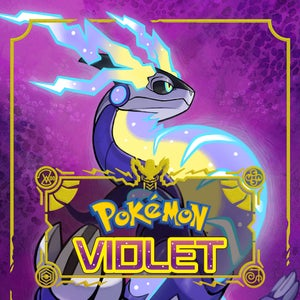

Hello all! In pursuit of being the very best that no one ever was, I decided to webscrape generation 9 base stats to see if I can pick out some top contender pokemon. A hit list for my future play-through, if you will. I have yet to pick up my very own copy of Pokemon Violet but I do want to be prepared. One of the fun things about this generation, apparently, is that you can travel throughout the land at whim rather than being restricted by the storyline or your level. Ostensibly one can plan a decent lineup in a game such as this with a little luck and a lot of effort.

The precursor to this notebook was the webscraping job, which came from [this part of the internet](https://game8.co/games/Pokemon-Scarlet-Violet/archives/391663#hl_1), and resulted in a tight little .csv that we will now use. I was very pleased that the good people of game8.co listed 422 pokemon rather than only the 107 new pokemon - thank you game8!

The overall goal here is to note any potential correlations between base stats and select pokemon accordingly. I'm hoping to find some well-balanced types rather than one-note wonders. Let's go!

## Importing Libraries, Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

poke = pd.read_csv('gen_9.csv')

In [2]:
poke.head()

,Unnamed: 0,Pokémon,H,A,B,C,D,S,Total
0,0,Koraidon,100,135,115,85,100,135,670
1,1,Miraidon,100,85,100,135,115,135,670
2,2,Slaking,150,160,100,95,65,100,670
3,3,Palafin (Hero Form),100,160,97,106,87,100,650
4,4,Garchomp,108,130,95,80,85,102,600


## A Brief Cleansing

The only thing we really have to clean is the now defunct index column from yore. Let's get a list of columns too; we'll have to change those to something readable.

In [3]:
poke = poke.drop('Unnamed: 0',axis=1)

In [4]:
poke.columns

Index(['Pokémon', 'H', 'A', 'B', 'C', 'D', 'S', 'Total'], dtype='object')

In [5]:
column_map = {
    'H':'HP',
    'A':'Attack',
    'B':'Defense',
    'C':'Special_Attack',
    'D':'Special_Defense',
    'S': 'Speed'
}
poke = poke.rename(columns=column_map)
poke.head()

,Pokémon,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Total
0,Koraidon,100,135,115,85,100,135,670
1,Miraidon,100,85,100,135,115,135,670
2,Slaking,150,160,100,95,65,100,670
3,Palafin (Hero Form),100,160,97,106,87,100,650
4,Garchomp,108,130,95,80,85,102,600


## Exploration

Let's get a brief statistical summary for this data.

In [6]:
poke.describe()

,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Total
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,70.616114,76.303318,68.151659,67.812796,67.248815,66.746445,416.440758
std,28.187774,29.808382,26.495834,28.443811,24.905564,28.202267,108.044418
min,10.000000,5.000000,5.000000,10.000000,20.000000,10.000000,180.000000
25%,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,316.250000
50%,68.000000,70.000000,65.000000,60.000000,65.000000,65.000000,453.000000
75%,85.000000,100.000000,80.000000,90.000000,81.750000,86.000000,500.000000
max,255.000000,160.000000,184.000000,145.000000,154.000000,150.000000,670.000000


In [7]:
poke.shape

(422, 8)

I'm pretty curious about the pokemon with 255 base HP. What even is that? 255 isn't even close to the 75th percentile of 85.

In [8]:
max_hp = poke[poke['HP']==255]
max_hp

,Pokémon,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Total
36,Blissey,255,10,10,75,135,55,540


Looks like it's this pink blimp thing with an egg in it - a Blissey:
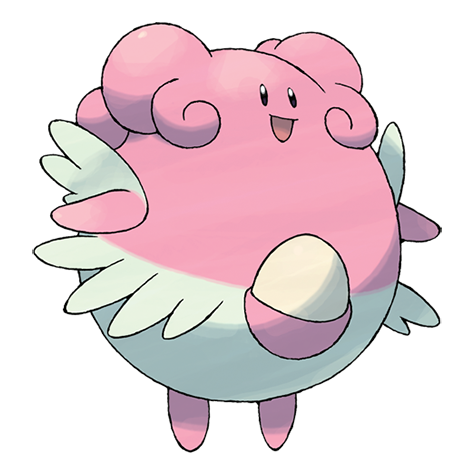
OK, I promise that was the one thing I wanted to check right out the gate. I sincerely did not expect Blissey to have the highest HP but there you go. According to my nerd colleagues, Chansey and its ilk (this thing) are really hard to kill in other games so this tracks.

I want to look at correlations, actually, and see if any of the stats tie together. I would rather do that than pull the top pokemon for each stat, although that's on my list *just because* I'm going to share this with a few friends who might want to know. I'm much more interested in getting balanced pokemon with higher stats than pokemon with one max stat like Blissey. That thing only has 10 attack and defense!

In [10]:
poke.corr(numeric_only = True)

,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Total
HP,1.000000,0.406550,0.304539,0.223042,0.387810,0.058692,0.614534
Attack,0.406550,1.000000,0.537323,0.195217,0.255145,0.328440,0.711573
Defense,0.304539,0.537323,1.000000,0.276299,0.431262,0.090411,0.662013
Special_Attack,0.223042,0.195217,0.276299,1.000000,0.578029,0.362714,0.664625
Special_Defense,0.387810,0.255145,0.431262,0.578029,1.000000,0.271334,0.723515
Speed,0.058692,0.328440,0.090411,0.362714,0.271334,1.000000,0.543896
Total,0.614534,0.711573,0.662013,0.664625,0.723515,0.543896,1.000000


These are all at least weakly correlated and many are moderately correlated. I will focus on the stronger correlations I find. In terms of the weaker ones, Speed is only moderately correlated with Total and has weaker ties to the other stats as well. Compare this to the other stats which are strongly correlated (above .5) with the total - weird. I'm going to write observations excluding the Total stat since all stats seem the most correlated with that.

* HP -- Moderately correlated with Attack, Defense, and Special Defense.
* Attack -- strongly correlated with Defense. Moderately correlated with Speed and HP. Slightly more strongly correlated with HP than Defense is.
* Defense -- Strongly correlated with Attack. Moderately correlated with Special Defense and HP.
* Special Attack -- Strongly correlated with Special Defense. Moderately correlated with Speed.
* Special Defense -- Strongly correlated with Special Attack. Moderately correlated with Defense and HP.
* Speed -- Weakest correlations of the bunch. Moderately correlated with Special Attack and Attack
* Total -- Strongly correlated with everything, because it's the Total

This mostly makes sense. You need Speed to Attack effectively, right? Weirdly, every stat but Special Attack has at least a moderate correlation with HP. If you couldn't tell by now, I'm trying to game these correlations to find a list of well-rounded pokemon. In a perfect world we would want a pokemon with maxed out stats all over the place but the game creators aren't likely to provide that service to us, the humble gamers. We can still check...

At this point I want to map some of these connections with scatterplots so I know what values to tap into my dataframe and save these precocious little monsters in their own offshoot dataframes.

## Defense and Attack

Since these stats have a strong correlation (.53) we definitely want to plot them and find out how to find balanced creatures.

Text(0, 198, 'You must choose wisely!')

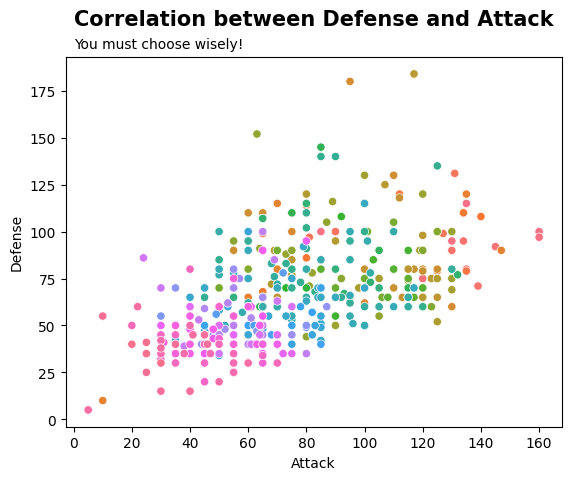

In [37]:
## switch pallettes
sns.color_palette("hls", 8)

## plot
ax1 = sns.scatterplot(poke,x='Attack',y='Defense',hue='Pokémon',legend=False)

## title
ax1.text(0,210,'Correlation between Defense and Attack',size=15,weight='bold')
ax1.text(0,198,'You must choose wisely!',size=10)

There seems to be a sacrifice with high attack and high defense - you get cut on the other stat. I want above median for each stat, so I'll search for pokemon who are 125 Defense or above and 120 Attack or above.

In [38]:
bool1 = (poke['Attack']>=120)&(poke['Defense']>=125)
high_ad = poke[bool1]
high_ad

,Pokémon,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Total
18,Great Tusk,115,131,131,53,53,87,570
188,Stonjourner,100,125,135,20,20,70,470


Both of these have above average Totals - Great Tusk's Total is even greater than the 75th percentile of the set. Their HP is in the 75th percentile, too! We notice, however, that their sp.Attack and sp.Defense are lacking. I would go for Great Tusk since its other stats raise its Total to something decently high.

I'm curious about the maxed out Defense babies we spy on the plot, so let's find those next.

In [40]:
high_def = poke[poke['Defense']>=175]
high_def

,Pokémon,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Total
46,Cloyster,50,95,180,85,45,70,525
70,Avalugg,95,117,184,44,46,28,514


These two have pretty good Totals - both more than 500. Avalugg has a 75th percentile Attack and Cloyser's Attack is well over average. Closter's Special Attack and Speed are above average but that's it for positive stats with these two. I would choose Cloyster but Avalugg has an above average HP and Cloyster has a below average HP...
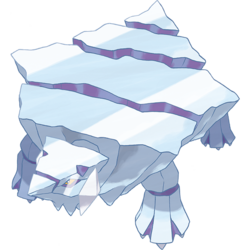

## Special Defense and Special Attack

Now let's check out Special Defense and Special Attack, which have a .57 correlation. Special Defense correlates with HP and Defense, and Special Attack correlates with Speed. So by souping up these stats, we should find some decent pokemon!

Text(0, 0.5, 'Special Defense')

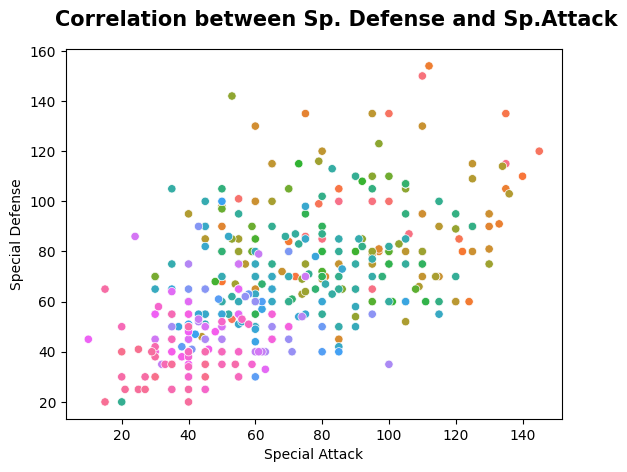

In [27]:
##plot
ax2 = sns.scatterplot(poke,x='Special_Attack',y='Special_Defense',hue='Pokémon',legend=False)

## title
ax2.text(0,170,'Correlation between Sp. Defense and Sp.Attack',size=15,weight='bold')

## labels
plt.xlabel('Special Attack')
plt.ylabel('Special Defense')

In [41]:
bool2 = (poke['Special_Defense']>=120)&(poke['Special_Attack']>=120)
high_sdsa = poke[bool2]
high_sdsa

,Pokémon,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Total
17,Chi-Yu,55,80,80,145,120,100,580
22,Flutter Mane,55,55,55,135,135,135,570


I'd hoped to pull pokemon with higher HP than this. Oh well. Each pokemon's total is in the high 500's, which is great. Speed beyond the 75th percentile as well. Chi-Yu has above average Attack and Defense so overall I would choose Chi-Yu over Flutter Mane.
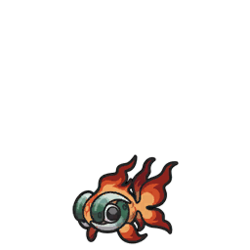

## Attack and HP

Now we're going to look at Attack and HP, which have a .4 correlation.

Text(0, 280, 'Correlation between Attack and HP')

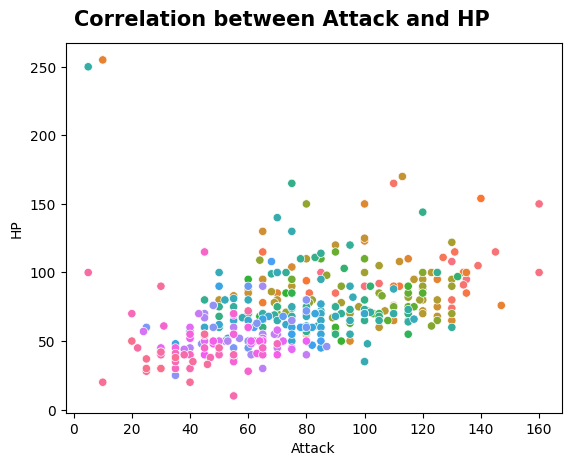

In [31]:
##plot
ax3 = sns.scatterplot(poke,x='Attack',y='HP',hue='Pokémon',legend=False)

## title
ax3.text(0,280,'Correlation between Attack and HP',size=15,weight='bold')

Who are these outlier freaks with the maxed out HP and no Attack? I'm checking that first.

In [43]:
high_hp = poke[poke['HP']>=250]
high_hp

,Pokémon,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Total
36,Blissey,255,10,10,75,135,55,540
212,Chansey,250,5,5,35,105,50,450


I guess we already knew about Blissey but now Chansey has come to the table. Both have great Special Defense (higher than 75th percentile) so these would be good pokemon to throw out when you need to heal the rest of your team. Now let's look at some more...balanced pokemon.

In [44]:
bool3 = (poke['HP']>=150)&(poke['Attack']>=130)
high_hpa = poke[bool3]
high_hpa

,Pokémon,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Total
2,Slaking,150,160,100,95,65,100,670
26,Iron Hands,154,140,108,50,68,50,570


Out of the two, it seems Slaking is the exceptional pokemon. Both are above 75th percentile in HP, Attack and Defense. Slaking has a Special Attack above 75th percentile *and* its speed is above 75th percentile, too. Slaking all the way!
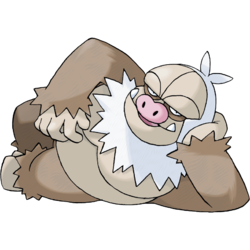

## Thunderdome!!

Now it's time to see which pokemon have the overall best stats. Who will be the most well-rounded?

In [49]:
combined = high_ad.append([high_sdsa,high_hpa])
combined

/tmp/ipykernel_4106/2292371321.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = high_ad.append([high_sdsa,high_hpa])


,Pokémon,HP,Attack,Defense,Special_Attack,Special_Defense,Speed,Total
18,Great Tusk,115,131,131,53,53,87,570
188,Stonjourner,100,125,135,20,20,70,470
17,Chi-Yu,55,80,80,145,120,100,580
22,Flutter Mane,55,55,55,135,135,135,570
2,Slaking,150,160,100,95,65,100,670
26,Iron Hands,154,140,108,50,68,50,570


It appears that Slaking is the winner since many of its stats are above 75th percentile and its Total is the highest! But what even is a Slaking?

According to [bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Slaking_(Pok%C3%A9mon), it's a Normal type pokemon that is 6'7 tall and weighs in at 287.7 pounds. Slaking can learn some Dark and Fighting moves, despite being weak to Fighting types in prior generations (no word yet on gen 9). I didn't find out where to find this thing in Generation 9 games, either.

## Conclusions

I didn't have any expectations walking in but, even so, I didn't expect to find a gorilla/abominable snowman type pokemon during this light project. Besides Slaking I think the others might be good to catch since they have at minimunm two high stats each.

Moving forward, I would like a more EXTREME collection of data, including lists of where to find the pokemon, so I could map out who to catch during my quest. At least I have a small base with this set!

## References

Pokemon pictures from [bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Main_Page).
Header image from [IGN](https://www.ign.com/games/pokemon-violet).